# Indeed.com - Job Description Analyis
I will use NLP (natural language processing) to analyse job adverts scraped from the uk.Indeed.com jobs website

I will focus on UK based jobs in the data industry, mainly in Scottish companies to start with, keeping the data gathering steps manageable, possibly expanding the study to the rest of the UK later.

I will write my own web scraper using the Requests and BeautifulSoup libraries.  I plan to process the text data using the nltk library

## What would the business purpose be?
Suppose I am running a hypothetical data analytics company.  I have been approached by another company who are hoping to build and recruit a data analytics team.  Since they don't have an existing data analytics team, I have been given a list of skills and experience they think they need.  My challenge is to classify what job title they should be marketing their vacancy for.  Should it be a Data Scientist, or a Data Engineer etc.

I am also (hypothetically) working with candidates to best tailor their CV, project portfolio etc to optimise for the things that data industry recruiters are looking for.  My study should be able to generate a list of the key things for each of the major data professions.

## Sections (rough outline)
- Scrape the data
- Data cleaning
- Data exploration
  - Extracting the list of top skills requirements for each of the main disciplines
  - Picking out common phrases to reference in an optimised CV
- Feature engineering
  - Job description length
  - Years of experience mentioned
  - Salary range (if enough data available)
  - Key tech stack tools included, cloud platforms, databases, NLP, dashboards etc.
  - Mentioning remote, flexible working etc
- Model Building
  - Classifier for labelling a job ad, with the most approproate job title.
  - Na   svieve Bayes
- Model Tuning



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
import indeed.IndeedScraper as ind
import re

# Scrape the data

In [2]:
# Manually trigger running the scraper or just loading existing data
scrape_new = False

f_name = 'data/data.csv'
if scrape_new or not os.path.isfile(f_name):
    ind.batch_scrape([('Data Scientist', 'Scotland'),
                      ('Data Engineer', 'Scotland'),
                      ('Data Analyst', 'Scotland'),
                      ('Business Analyst', 'Scotland'),
                      ('Machine Learning Engineer', 'Scotland'),
                      ('Machine Learning', 'Scotland'),
                      ('Artificial Intelligence', 'Scotland'),
                      ('AI', 'Scotland'),
                      ('Data', 'Scotland')],
                     pages=20,
                     delay=5,
                     append=False)
    df = pd.read_csv(f_name, index_col=0)
else:
    df = pd.read_csv(f_name, index_col=0)
    print(f'Data read from .csv ({len(df)} rows, {len(df.columns)} columns)')


Data read from .csv (998 rows, 13 columns)


# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             998 non-null    object
 1   id                998 non-null    object
 2   company           998 non-null    object
 3   url               998 non-null    object
 4   location          998 non-null    object
 5   summary           998 non-null    object
 6   date              998 non-null    object
 7   description       998 non-null    object
 8   description_html  998 non-null    object
 9   page_format       998 non-null    int64 
 10  salary            129 non-null    object
 11  query_title       998 non-null    object
 12  query_loc         998 non-null    object
dtypes: int64(1), object(12)
memory usage: 109.2+ KB


In [4]:
df.shape

(998, 13)

## Drop duplicates
Some (not all) duplicates are removed by the scraping routine.

Check if there are any duplicates in the "id" column.  Since the scraped csv data was simply multiple search queries, then results appended into one big csv file.  It's possible for there to be some duplicates where id numbers are the same, between the multiple batches.

In [5]:
df.duplicated('id').sum()

293

In [6]:
df = df.drop_duplicates('id', ignore_index=True)
df.shape

(705, 13)

## Fix column dtypes
Turn query_title into categorical column

In [7]:
df['query_title'] = df['query_title'].astype('category')

## Crop the "new" prefix
Looks like some of the job titles were prefixed with "new...".  This will interfere with the word matching so let's remove it.

In [8]:
mask = df.title.str.contains('^new', regex=True)
df[mask].title.iloc[:10].tolist()

['newData Science Lecturer (International Development)',
 'newAnalytics Coordinator',
 'newReporting Analyst',
 'newPolicy Analyst',
 'newWind Analyst',
 'newData Quality & Remediation Analyst',
 'newBusiness Information Analyst- Business Coordinator',
 'newData Analyst role within Flow Cytometry lab',
 'newInformation Analyst (Planning and Insight)',
 'newBusiness Analyst']

Crop the prefix off the title value

In [9]:
df.title = df.title.agg(lambda x: re.sub('^new','',x,1))

# Check that none with prefix still exist
mask = df.title.str.contains('^new', regex=True)
df[mask].title.iloc[:10].tolist()

[]

# Data exploration

Try a few things
- Wordcl
- nltk freqdistoud

## Wordcloud
Create a wordcloud for all job description text.

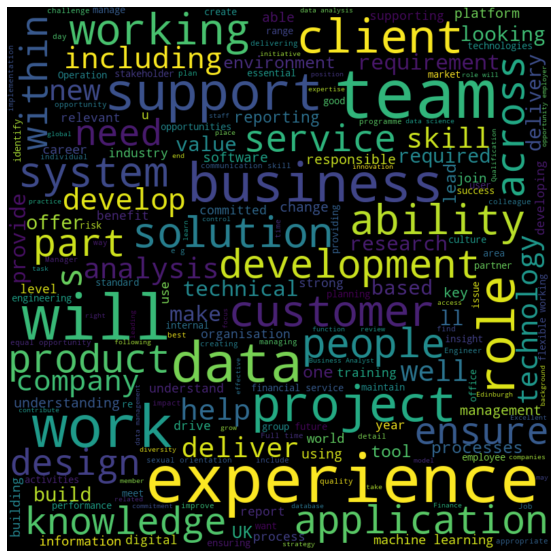

In [10]:
from wordcloud import WordCloud

# Read the whole text.
text = ' '.join(df['description'].tolist())

# Generate a word cloud image
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=100, width=800, height=800).generate(text)
WordCloud()
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Create a wordcloud for all jobtitle text only

Analyst, 

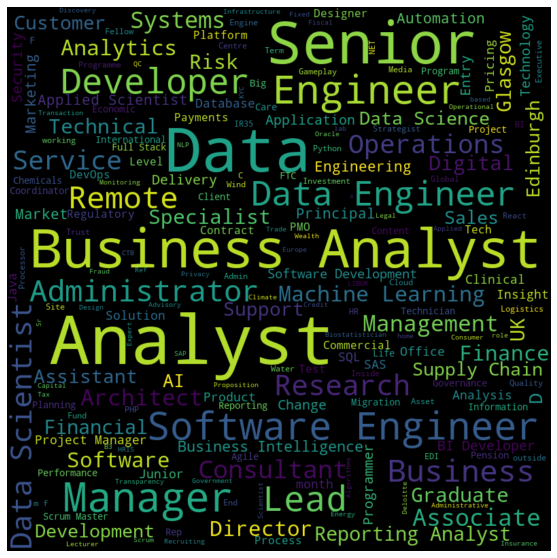

In [11]:
# Read the job title only]
text = ' '.join(df['title'].tolist())

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=100, width=800, height=800).generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("offhhhhhh"
plt.show()
